# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Firman Fitrah Ramadhan
- **Email:** firmanfitrahramadhan38@gmail.com
- **ID Dicoding:** firman_fitrah_ramadhan_XNq4

## Menentukan Pertanyaan Bisnis

- Bagaimana tren dari peminjaman dalam kurun waktu setahun berdasarkan musim
- Faktor utama yang mempengaruhi jumlah peminjaman sepeda pada hari kerja

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Mendapatkan data penting seperti hari (dteday), musim (season), cuaca (weathersit), dan jumlah peminjaman (cnt)

### Assessing Data

In [3]:
print("jumlah duplikasi yang ada:", df.duplicated().sum())
df.describe()
df.info()
df.isna().sum()
print(df.columns)

jumlah duplikasi yang ada: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', '

**Insight:**
- Tidak ada duplikat atau missing value

### Cleaning Data

In [4]:
df.drop(columns=["instant"], inplace=True)
df["season"] = df["season"].astype("category")
df["weathersit"] = df["weathersit"].astype("category")
df["weekday"] = df["weekday"].astype("category")


**Insight:**
- Menghapus tabel instant yang tidak memiliki makna data apapun
- Menjadikan season, weathersit, dan weekday menjadi tipe kategori

## Exploratory Data Analysis (EDA)

### Distribusi Data Peminjaman Sepeda

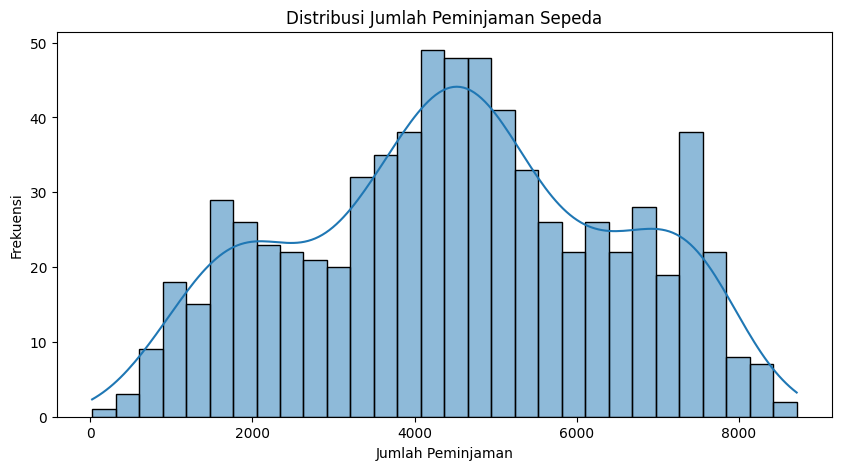

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Peminjaman Sepeda")
plt.xlabel("Jumlah Peminjaman")
plt.ylabel("Frekuensi")
plt.show()


**Insight:**
- Terdapat beberapa puncak pada grafik, menunjukkan adanya pola musiman atau faktor eksternal laainnya yang mempengaruhi peminjaman sepeda

### Tren Peminjaman sepeda berdasarkan musim

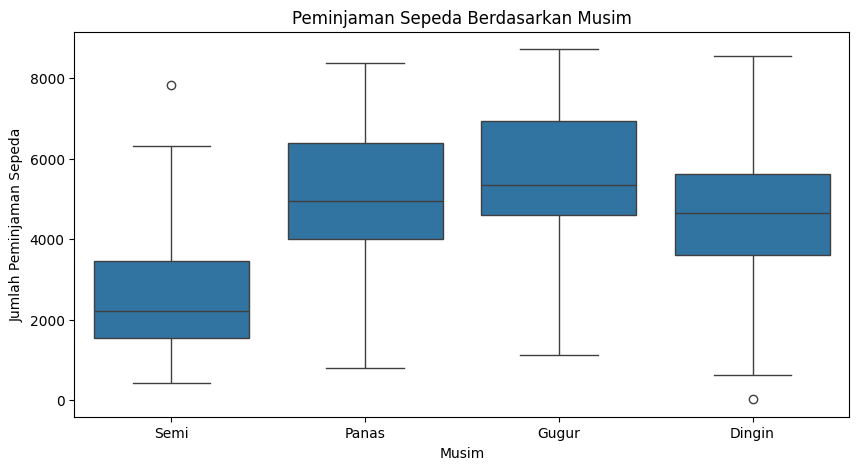

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(x="season", y="cnt", data=df)
plt.title("Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=["Semi","Panas","Gugur","Dingin"])
plt.show()

**Insight:**
- Peminjaman tertinggi terjadi pada musim dengan suhu yang relatif hangat (musim gugur dan musim panas)
- Pada musim dingin, peminjaman memiliki jumlah terendah

### Faktor yang mempengaruhi Peminjaman Sepeda di Hari Kerja

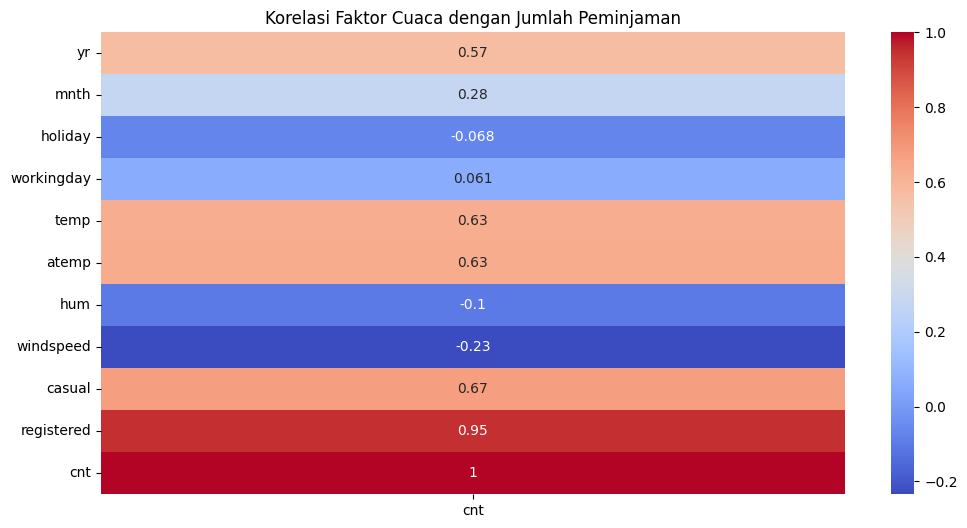

In [7]:
num_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(num_df.corr()[["cnt"]], annot=True, cmap="coolwarm")
plt.title("Korelasi Faktor Cuaca dengan Jumlah Peminjaman")
plt.show()

**Insight:**
- Korelasi mengatakan bahwa suhu berkorelasi positif dengan jumlah peminjaman
- Curah Hujan dan angin memiliki korelasi negatif dengan jumlah peminjaman
- JUmlah peminjaman lebih tinggi pada hari kerja dibandingkan akhir pekan menunjukkan penggunaan untuk keperluan transportasi

<ipython-input-8-d27c548d5348>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["weekday"].cat.codes, y=df["cnt"], ci=None)


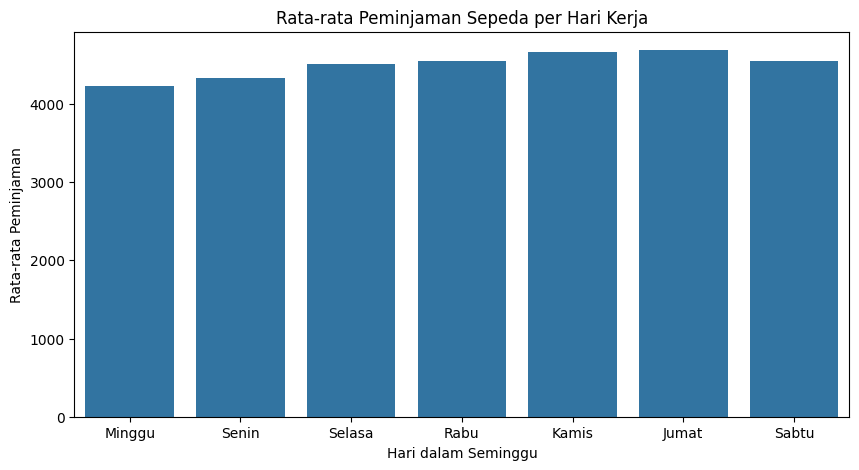

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["weekday"].cat.codes, y=df["cnt"], ci=None)
plt.title("Rata-rata Peminjaman Sepeda per Hari Kerja")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Peminjaman")
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=["Minggu","Senin","Selasa","Rabu","Kamis","Jumat","Sabtu"])
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

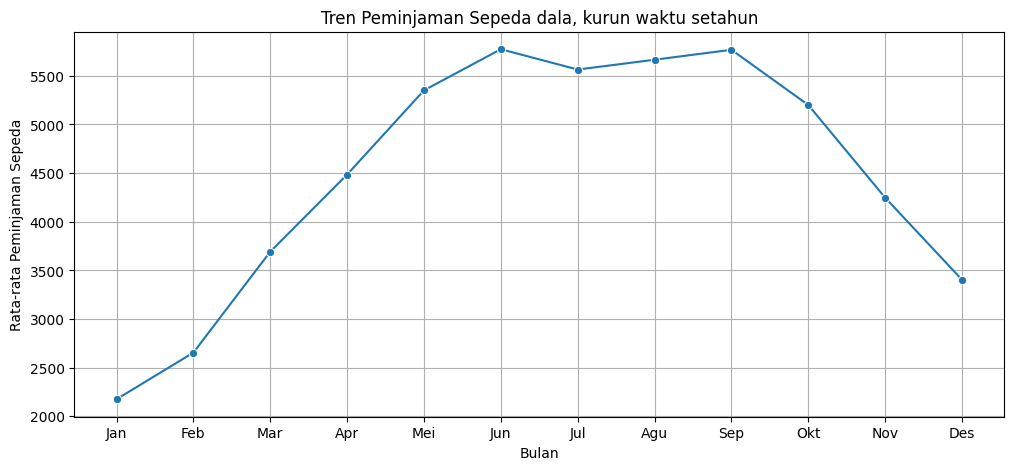

In [14]:
df["dteday"] = pd.to_datetime(df["dteday"])
df["month"] = df["dteday"].dt.month

plt.figure(figsize=(12, 5))
sns.lineplot(data=df.groupby("month")["cnt"].mean().reset_index(), x="month", y="cnt", marker='o')
plt.title("Tren Peminjaman Sepeda dalam kurun waktu setahun")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.grid(True)
plt.show()


### Pertanyaan 2:

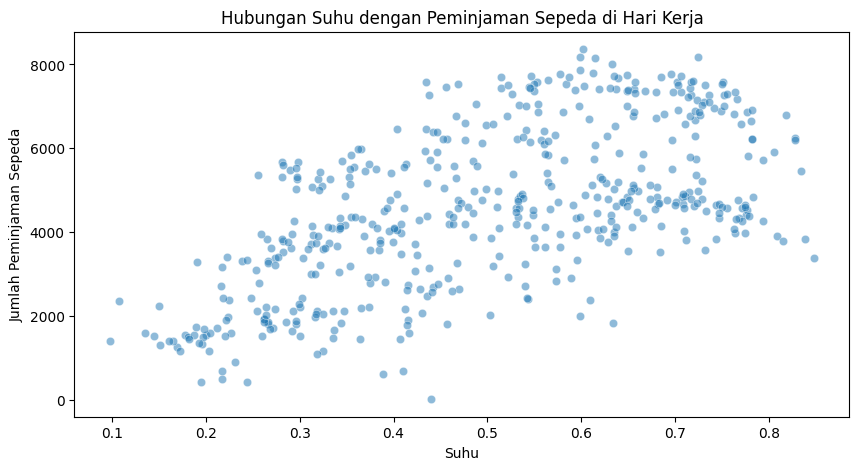

In [ ]:
weekday_df = df[df["workingday"] == 1]

plt.figure(figsize=(10,5))
sns.scatterplot(x="temp", y="cnt", data=weekday_df, alpha=0.5)
plt.title("Hubungan Suhu dengan Peminjaman Sepeda di Hari Kerja")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()


**Insight:**
- Tren menunjukkan peningkatan signifikan pada bulan Januari hingga September yang disebabkan oleh musim yang mendukung (musim panas, sem, dan gugur)

- Penurunan tajam terjadi saat musim dingin.

- Musim memengaruhi pola peminjaman secara signifikan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

Peminjaman sepeda lebih tinggi pada musim panas dan gugur, serta lebih rendah pada musim dingin. Oleh karena itu, diperlukan strategi pemasaran di musim dingin agar jumlah peminjaman tidak turun drastis.

Faktor cuaca seperti suhu dan hujan juga memengaruhi jumlah peminjaman sepeda. Oleh karena itu, infrastruktur yang mendukung peminjaman di cuaca buruk perlu diperhatikan.

- Conclution pertanyaan 2

Peminjaman lebih tinggi pada hari kerja dibanding akhir pekan. Ini menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai transportasi harian, sehingga strategi pemasaran bisa difokuskan pada segmen ini.